# Concentration Analytic Solution

In [33]:
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np
import solutionV2 as sol
import numpy as np


N = 1E3 + 2
length = 20 #* k * d
step = np.float_(length/N)
xi = np.arange(0, length, step)


params = {
    "z": 2,
    "e": 1.60217662E-19,
    "kb": 1.38064852E-23,
    "T": 300,
    "Na": 6.02E23,
    "Fa": 96485.3329,#Na * e
    "R": 8.314472,
    "V0": -0.15,
    "D1": 1.05,
    "D2":  0.76,
    "Cb": 1e-3,
    #d = 1.544E-6
    "epsilon": 80.9 * 8.85418782E-12,
    "length": 20.0
}

model = sol.model(params)
analytic_concentration = model.Cp_r
analytic_potential = model.potential_r

Cp_all = []
Cm_all = []
reactRate = np.array([1, 5, 7])*5e-5
for i in range(0,len(reactRate)):
    X, Cp, Cm = analytic_concentration(xi, reactRate[i])
    Cp_all.append(Cp)
    Cm_all.append(Cm)

Psi_all = []
E_all = []

for i in range(0,len(reactRate)):
    X, aux1, aux2 = analytic_potential(xi, reactRate[i])
    Psi_all.append(aux1)
    E_all.append(aux2)

    

r value: 5e-05
r value: 0.00025
r value: 0.00035
r value = 5e-05
r value = 0.00025
r value = 0.00035


# Potential Analytic Solution

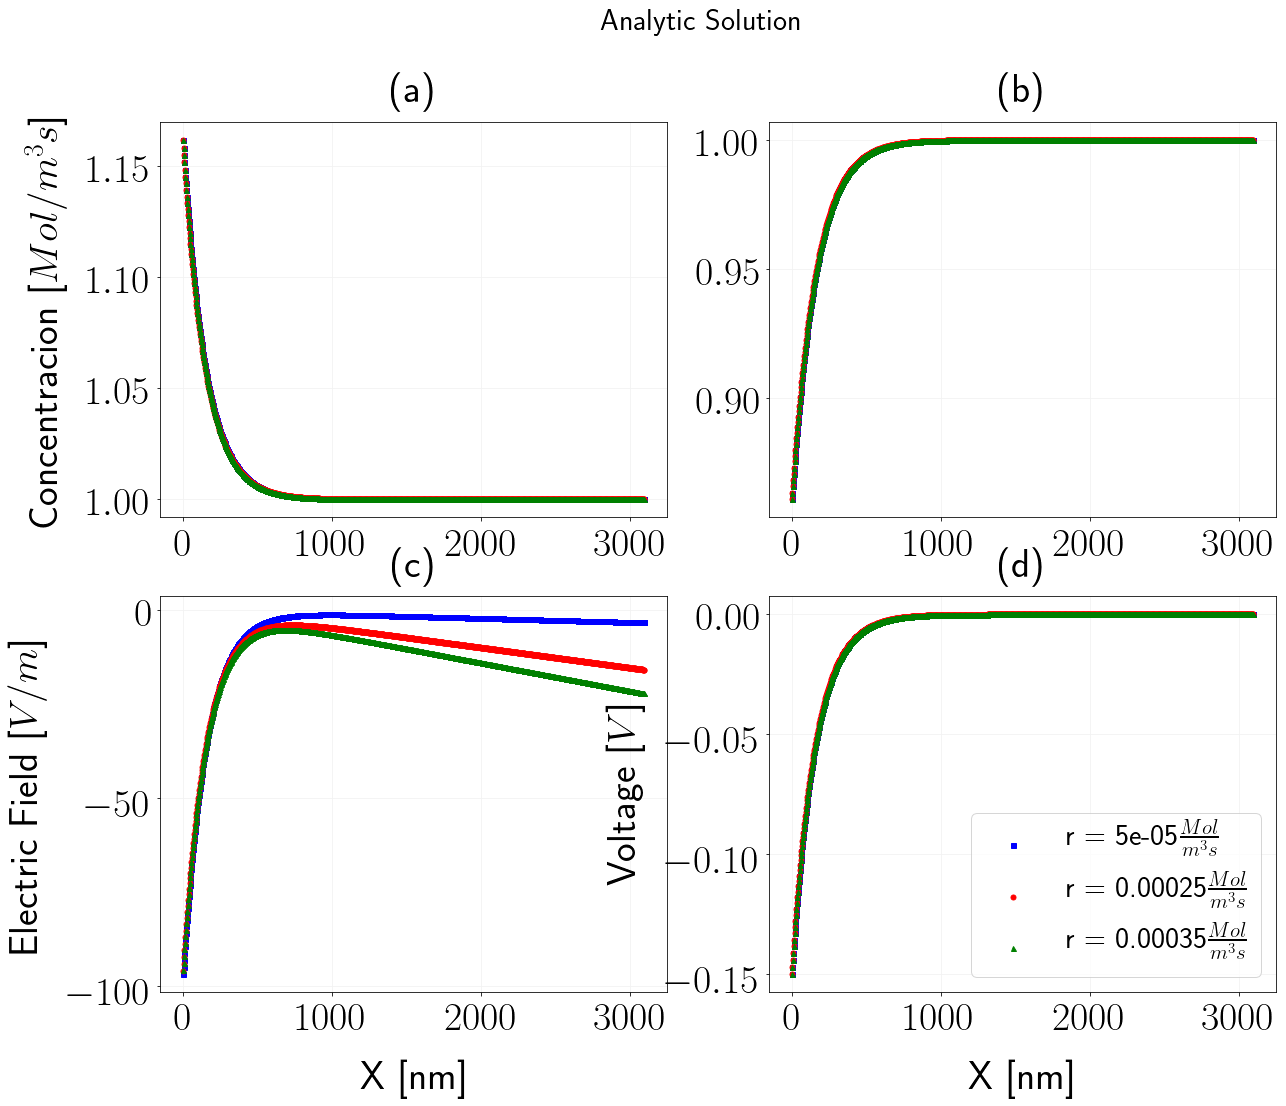

In [34]:
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.pyplot as plt  

mw =5
r0 = reactRate[0]
r1 = reactRate[1]
r2 = reactRate[2]
to_molar = 1e3
fig, ax = plt.subplots(figsize=(20,16))
plt.style.use('thesis')
plt.suptitle('Analytic Solution')

plt.subplot(2,2,1)
plt.title(r'(a)', fontweight='bold')
plt.ylabel(r'Concentracion [$Mol/m^3s$]')

plt.plot(X, to_molar*Cp_all[0], 'bs', markersize=mw, label='r = '+str(r0)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, to_molar*Cp_all[1], 'ro', markersize=mw, label='r = '+str(r1)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, to_molar*Cp_all[2], 'g^', markersize=mw, label='r = '+str(r2)+r'$\frac{Mol}{m^3s}$')    
#plt.ylim(0,10)

plt.subplot(2,2,2)
plt.title(r'(b)', fontweight='bold')
plt.plot(X, to_molar*Cm_all[0], 'bs', markersize=mw, label='r = '+str(r0)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, to_molar*Cm_all[1], 'ro', markersize=mw, label='r = '+str(r1)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, to_molar*Cm_all[2], 'g^', markersize=mw, label='r = '+str(r2)+r'$\frac{Mol}{m^3s}$')    

scale_factor = 1e-4
plt.subplot(2,2,3)
plt.title(r'(c)', fontweight='bold')
plt.ylabel(r'Electric Field [$V/m$]')
plt.plot(X, E_all[0] * scale_factor, 'bs', markersize=mw, label='r = '+str(r0)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, E_all[1] * scale_factor, 'ro', markersize=mw, label='r = '+str(r1)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, E_all[2] * scale_factor, 'g^', markersize=mw, label='r = '+str(r2)+r'$\frac{Mol}{m^3s}$')
plt.xlabel('X [nm]')
plt.subplot(2,2,4)

plt.title(r'(d)', fontweight='bold')
plt.ylabel(r'Voltage [$V$]')
plt.plot(X, Psi_all[0], 'bs',markersize =mw, label='r = '+str(r0)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Psi_all[1], 'ro', markersize=mw, label='r = '+str(r1)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Psi_all[2], 'g^', markersize=mw, label='r = '+str(r2)+r'$\frac{Mol}{m^3s}$')
plt.xlabel('X [nm]')
plt.legend()

plt.savefig('../../../../img/analytic-results.eps', dpi=1000, fontweight='bold')
plt.show()


In [35]:
def get_static_sol(filename):
    file = open(filename, 'r')
    X = []
    Y = []
    for line in file:
        aux1, aux2 = line.split()
        X.append(float(aux1))
        Y.append(float(aux2))
    file.close()
    return X, Y

def rmPoints(A):
    A = np.delete(A, [1, 2, 3])
    for i in range(0,int(len(A)/4)):
        index = i+4
        A = np.delete(A, [index-2, index-1, index])
    return A

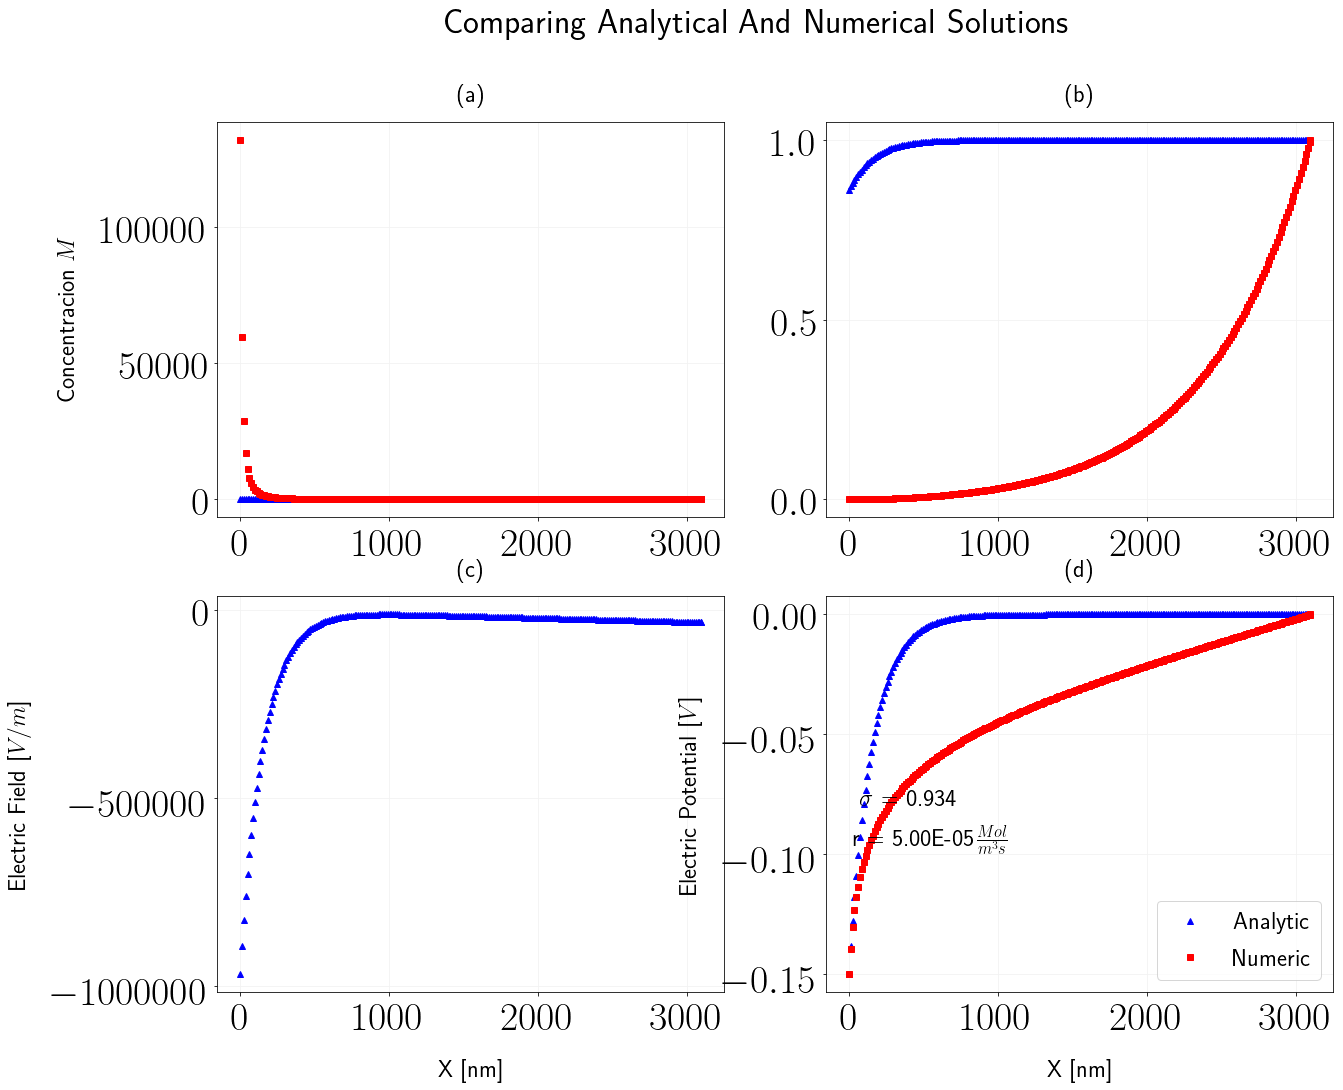

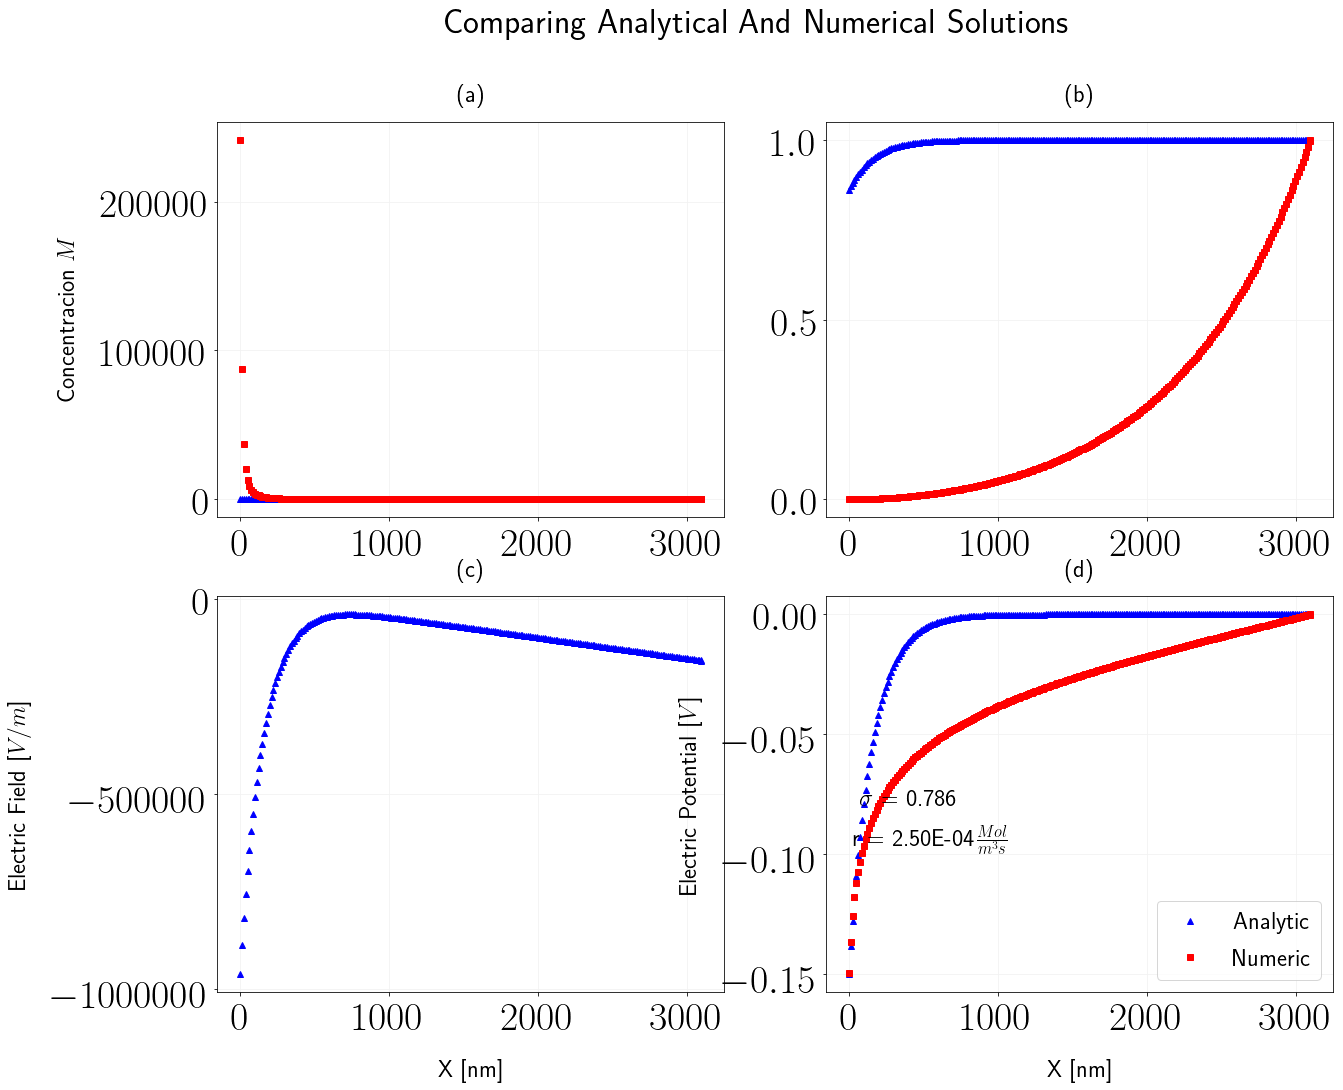

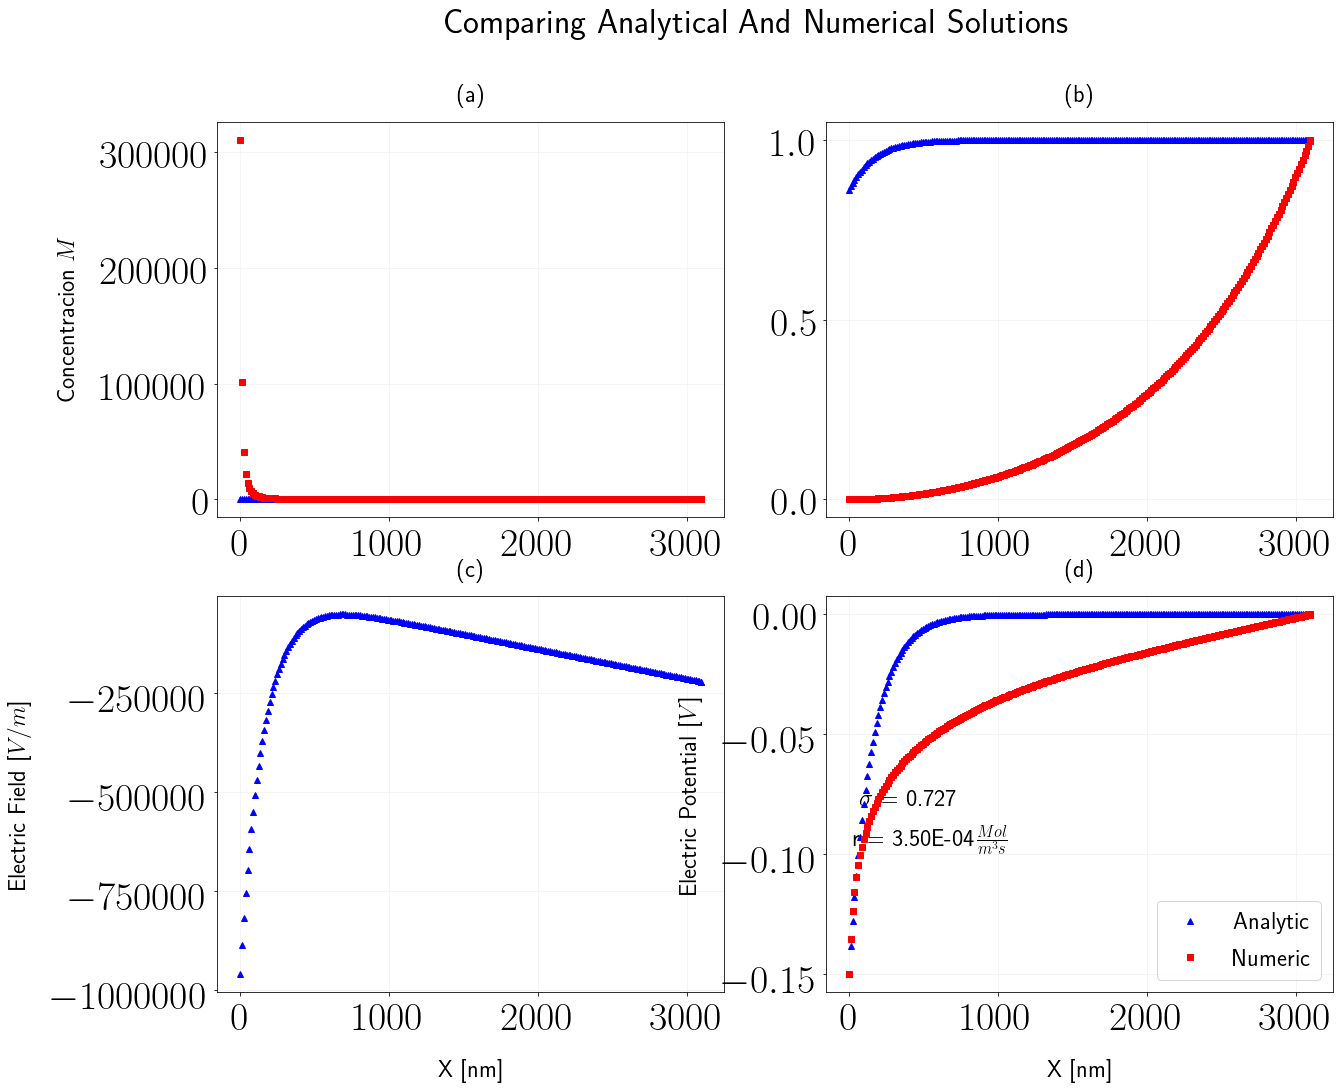

In [36]:
from decimal import Decimal
#analytic_concentration = sol.analytic_concentration
#analytic_concentration = sol.analytic_concentration
#analytic_potential = sol.analytic_potential
 
fs = 24
params = {
    "z": 2,
    "e": 1.60217662E-19,
    "kb": 1.38064852E-23,
    "T": 300,
    "Na": 6.02E23,
    "Fa": 96485.3329,#Na * e
    "R": 8.314472,
    "V0": -0.15,
    "D1": 1.05,
    "D2":  0.76,
    "Cb": 1e-3,
    #d = 1.544E-6
    "epsilon": 80.9 * 8.85418782E-12,
    "length": 20.0
}
plt.style.use('thesis')
import numpy as np
reactRate = np.array([1, 5, 7])*5e-5
mw = 6
anCp = []
anCm = []
model = sol.model(params)
analytic_concentration = model.Cp_r
analytic_potential = model.potential_r

reactRate = np.array([1, 5, 7])*5e-5
    
for i in range(len(reactRate)):
    r0 = reactRate[i]
    numX, numCp = get_static_sol('../results/cp-num-r'+str(r0)+'.txt') 
    numX = np.array(numX)
    #anX, anCp, anCm = analytic_concentration(numX, reactRate[i])
    #anX, anE, anPhi =  analytic_potential(numX, reactRate[i])
    anCp = Cp_all[i]
    anCm = Cm_all[i]
    anE = E_all[i]
    anPhi = Psi_all[i]
    anX = numX
    numX2, numCm = get_static_sol('../results/cm-num-r'+str(r0)+'.txt') 
    
    numX3, numE = get_static_sol('../results/E-num-r' + str(r0) + '.txt') 
    #anX4, anPhi = get_static_sol('../results/potential1-A'+str(r0)+'.txt')
    numX4, numPhi = get_static_sol('../results/potential-num-r'+str(r0)+'.txt') 
    
    
    sigPsi = np.sqrt((np.array(anPhi)- np.array(numPhi))**2).sum()/np.sqrt(len(numPhi[1:-1]))
    sigE = np.sqrt((np.array(anE)- np.array(numE))**2).sum()/np.sqrt(len(numE[1:-1]))
    sigCp = np.sqrt((np.array(anCp)- np.array(numCp))**2).sum()/np.sqrt(len(numCp[1:-1]))
    sigCm = np.sqrt((np.array(anCm)- np.array(numCm))**2).sum()/np.sqrt(len(numCm[1:-1]))

    
    plt.figure(figsize=(20,16))
    plt.suptitle('Comparing Analytical And Numerical Solutions', fontsize=34)
    plt.subplot(2,2,1)
    plt.title(r'(a)', fontsize=fs, fontweight='bold')
    plt.ylabel(r'Concentracion $M$', fontsize=fs)
    #plt.text(65, 2.5, r'$\sigma$ =  %.3f'%sigCp, fontsize=fs)

    plt.plot(rmPoints(numX), 1e3*rmPoints(anCp), 'b^', linewidth=mw)
    plt.plot(rmPoints(numX), 1e3*rmPoints(numCp), 'rs', markersize=mw)

    
    plt.subplot(2,2,2)
    plt.title(r'(b)', fontsize=fs, fontweight='bold')
    plt.plot(rmPoints(numX), 1e3*rmPoints(anCm), 'b^', linewidth=mw)
    plt.plot(rmPoints(numX), 1e3*rmPoints(numCm), 'rs', markersize=mw)
    #plt.text(65, 0.2, r'$\sigma$ =  %.3f'%sigCm, fontsize=fs)

    plt.subplot(2,2,3)
    plt.title(r'(c)', fontsize=fs, fontweight='bold')
    plt.plot(rmPoints(numX), rmPoints(anE), 'b^', linewidth=mw)
    #plt.plot(rmPoints(numX), rmPoints(numE), 'rs', markersize=mw)
    plt.xlabel('X [nm]', fontsize=fs)
    plt.ylabel(r'Electric Field [$V/m$] ', fontsize=fs)
    #plt.text(65, 1.5, r'$\sigma$ =  %.3f'%sigE, fontsize=fs)
    
    plt.subplot(2,2,4)
    plt.title(r'(d)', fontsize=fs, fontweight='bold')
    plt.plot(rmPoints(numX), rmPoints(anPhi), 'b^', linewidth=mw, label='Analytic')
    plt.plot(rmPoints(numX), rmPoints(numPhi), 'rs', markersize=mw, label='Numeric')
    plt.xlabel('X [nm]', fontsize=fs)
    plt.text(30, -0.10, 'r = '+str('%.2E' % Decimal(str(r0)))+r'$\frac{Mol}{m^3s}$', fontsize=fs)
    plt.text(65, -0.08, r'$\sigma$ = %.3f'%sigPsi, fontsize=fs)
    plt.legend(prop={'size': 24})
    plt.ylabel(r'Electric Potential [$V$] ', fontsize=fs)
    plt.savefig('../../../../img/comparison'+str(i)+'.eps', format='eps', dpi=1000, fontsize=fs, fontweight='bold')
    plt.show()
    

    #plt.plot(111)
    #plt.title(r'Porcentual Error', fontsize=fs)#, fontweight='bold')
    #plt.ylabel(r'Error', fontsize=fs*0.8)
    #Psi_sigma = np.abs((np.array(anPhi) - np.array(numPhi[1:-1]))/np.array(numPhi[1:-1]))
    #plt.plot(anX, Psi_sigma, 'b-', linewidth=mw*0.5, label='r = '+str(r0)+r'$\frac{Mol}{m^3s}$')
    #plt.ylim(0,1)
    #plt.xlabel('X [nm]', fontsize=fs*0.8)

#    plt.legend(prop={'size': 12})
#    plt.savefig('error.eps', format='eps', dpi=1000, fontsize=fs, fontweight='bold')
